In [31]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

home directory is unset
y1000plus_tools dir is unset
y1000plus data dir is unset
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Importing y1000plus_tools.py
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions'

In [6]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'

y1000_species_subset = y1000_species[(y1000_species['Major clade'].isin(clades_of_interest))  |  (y1000_species['Species name'].isin(outgroups))]


#outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
#y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])
y1000_species_subset

#load specific outgroup proteins for example goi pairs
outgroup_dict = {'GPM2_GPM3': 'hanseniaspora_vinae_Seq_2544', 'GND2_GND1': 'yarrowia_lipolytica_Seq_1481', 'EGO4_EGO2': 'hanseniaspora_vinae_Seq_1783'}  # hanseniaspora alternative for GND1/2 'hanseniaspora_vinae_Seq_3519'

In [7]:
#Load prom_phyls which maps results from manual curation of WGH orthologs
prom_phyls = {}

prom_phyl = {}
prom_phyl_YGOB = {}
#prom_phyl['high'] = ['saccharomyces_cerevisiae_YDL021W', 'saccharomyces_mikatae_Seq_4168', 'saccharomyces_kudriavzevii_Seq_2898', 'saccharomyces_uvarum_Seq_298','candida_glabrata_Seq_689']
prom_phyl['high'] = ['saccharomyces_cerevisiae_YDL021W',
 'nakaseomyces_castellii_Seq_2450',
 'nakaseomyces_bacillisporus_Seq_147',
 'candida_glabrata_Seq_689',
 'nakaseomyces_bracarensis_Seq_1806',
 'nakaseomyces_delphensis_Seq_2587',
 'nakaseomyces_nivariensis_Seq_2262',
 'saccharomyces_eubayanus_Seq_4042',
 'saccharomyces_uvarum_Seq_298',
 'saccharomyces_arboricola_Seq_2168',
 'saccharomyces_kudriavzevii_Seq_2898',
 'saccharomyces_mikatae_Seq_4168',
 'saccharomyces_paradoxus_Seq_4505']


prom_phyl_YGOB['high'] = ['YDL021W', 'Smik_4.214','Skud_4.228','Suva_4.227', 'CAGL0K01705g']

#prom_phyl['low'] = ['saccharomyces_cerevisiae_YOL056W', 'saccharomyces_mikatae_Seq_453', 'saccharomyces_uvarum_Seq_4445', 'kazachstania_africana_Seq_41', 'naumovozyma_castellii_Seq_1503', 'naumovozyma_dairenensis_Seq_3200', 'tetrapisispora_blattae_Seq_2219', 'tetrapisispora_phaffii_Seq_3511', 'vanderwaltozyma_polyspora_Seq_4285']
prom_phyl['low'] = ['saccharomyces_cerevisiae_YOL056W',
 'kazachstania_africana_Seq_41',
 'naumovozyma_castellii_Seq_1503',
 'naumovozyma_dairenensis_Seq_3200',
 'saccharomyces_eubayanus_Seq_4127',
 'saccharomyces_mikatae_Seq_453',
 'saccharomyces_paradoxus_Seq_556',
 'saccharomyces_uvarum_Seq_4445',
 'tetrapisispora_phaffii_Seq_3511',
 'vanderwaltozyma_polyspora_Seq_4285',
 'yHAB132_kazachstania_martiniae_160519_Seq_4635',
 'yHAB133_kazachstania_unispora_160519_Seq_2374',
 'yHAB134_kazachstania_turicensis_160519_Seq_1990',
 'yHAB143_kazachstania_siamensis_160519_Seq_1903',
 'yHAB147_kazachstania_taianensis_160519_Seq_2501',
 'yHAB153_kazachstania_rosinii_160519_Seq_2148',
 'yHAB158_kazachstania_viticola_160519_Seq_4041',
 'yHAB159_kazachstania_solicola_160519_Seq_4608',
 'yHAB164_kazachstania_aerobia_160519_Seq_2028',
 'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_3577',
 'yHMPu5000034876_tetrapisispora_iriomotensis_160519_Seq_3652',
 'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_4595']

prom_phyl_YGOB['low'] = ['YOL056W', 'Smik_15.103', 'Skud15.97', 'Suva15.109', 'KAFR0C00970', 'KNAG0K01200', 'NCAS0C03650', 'NDAI0G02990', 'TBLA0G00870', 'TPHA0P00600', 'Kpol_1045.50']

prom_phyls['GPM2_GPM3'] = prom_phyl

prom_phyl = {}
prom_phyl_YGOB = {}
#prom_phyl['high'] = ['saccharomyces_cerevisiae_YGR256W',  'saccharomyces_kudriavzevii_Seq_1713', 'saccharomyces_uvarum_Seq_4669', 'kazachstania_africana_Seq_4332', 'kazachstania_naganishii_Seq_4463']

prom_phyl['high'] = ['saccharomyces_cerevisiae_YGR256W',
 'kazachstania_africana_Seq_4332',
 'nakaseomyces_bacillisporus_Seq_4561',
 'saccharomyces_eubayanus_Seq_2030',
 'saccharomyces_uvarum_Seq_4669',
 'saccharomyces_arboricola_Seq_4380',
 'saccharomyces_kudriavzevii_Seq_1713',
 'saccharomyces_paradoxus_Seq_87',
 'yHAB158_kazachstania_viticola_160519_Seq_1107',
 'yHAB153_kazachstania_rosinii_160519_Seq_85',
 'yHAB155_kazachstania_spencerorum_160519_Seq_626',
 'yHAB132_kazachstania_martiniae_160519_Seq_4190',
 'yHAB148_kazachstania_intestinalis_160519_Seq_1326',
 'yHAB136_kazachstania_bromeliacearum_160519_Seq_3141',
 'kazachstania_naganishii_Seq_4463',
 'yHAB147_kazachstania_taianensis_160519_Seq_3956',
 'yHAB166_kazachstania_yakushimaensis_160519_Seq_4162',
 'yHAB154_kazachstania_transvaalensis_160519_Seq_432',
 'yHAB143_kazachstania_siamensis_160519_Seq_5064',
 'yHAB133_kazachstania_unispora_160519_Seq_1356',
 'yHAB164_kazachstania_aerobia_160519_Seq_1036',
 'yHAB159_kazachstania_solicola_160519_Seq_680']

prom_phyl_YGOB['high'] = ['YGR256W', 'Skud_7.590','Suva_7.554', 'KAFR0B04490', 'KNAG0K00390']

#prom_phyl['low'] = ['saccharomyces_cerevisiae_YHR183W', 'saccharomyces_mikatae_Seq_4845', 'saccharomyces_uvarum_Seq_4794', 'saccharomyces_kudriavzevii_Seq_185', 'candida_glabrata_Seq_5136', 'kazachstania_africana_Seq_551', 'naumovozyma_castellii_Seq_43', 'naumovozyma_dairenensis_Seq_164', 'tetrapisispora_blattae_Seq_92']
prom_phyl['low'] = ['saccharomyces_cerevisiae_YHR183W',
 'candida_glabrata_Seq_5136',
 'naumovozyma_castellii_Seq_43',
 'tetrapisispora_blattae_Seq_92',
 'yHMPu5000035629_yueomyces_sinensis_160519_Seq_977',
 'nakaseomyces_castellii_Seq_4652',
 'nakaseomyces_bacillisporus_Seq_1423',
 'nakaseomyces_bracarensis_Seq_1690',
 'nakaseomyces_delphensis_Seq_1403',
 'nakaseomyces_nivariensis_Seq_5143',
 'saccharomyces_eubayanus_Seq_879',
 'saccharomyces_uvarum_Seq_4794',
 'saccharomyces_arboricola_Seq_3052',
 'saccharomyces_kudriavzevii_Seq_185',
 'saccharomyces_mikatae_Seq_4845',
 'saccharomyces_paradoxus_Seq_2121',
 'naumovozyma_dairenensis_Seq_164',
 'yHAB158_kazachstania_viticola_160519_Seq_1939',
 'kazachstania_africana_Seq_551',
 'yHAB153_kazachstania_rosinii_160519_Seq_895',
 'yHAB155_kazachstania_spencerorum_160519_Seq_5608',
 'yHAB160_kazachstania_kunashirensis_160519_Seq_407',
 'yHAB134_kazachstania_turicensis_160519_Seq_2234',
 'yHAB148_kazachstania_intestinalis_160519_Seq_3782']

prom_phyl_YGOB['low'] = ['YHR183W', 'Smik_8.271', 'Skud_8.246', 'Suva_15.384', 'CAGL0M13343g','KAFR0B1610',  'NCAS0F02030', 'NDAI0C03490',  
'TBLA0C06670']
prom_phyls['GND2_GND1'] = prom_phyl


prom_phyl = {}
prom_phyl_YGOB = {}
prom_phyl['high'] = ['saccharomyces_cerevisiae_YNR034W-A',
 'naumovozyma_castellii_Seq_527',
 'naumovozyma_castellii_Seq_246',
 'naumovozyma_dairenensis_Seq_2475',
 'yHAB148_kazachstania_intestinalis_160519_Seq_3037',
 'yHAB132_kazachstania_martiniae_160519_Seq_325',
 'yHAB158_kazachstania_viticola_160519_Seq_4005',
 'kazachstania_africana_Seq_4330',
 'saccharomyces_paradoxus_Seq_2332',
 'saccharomyces_mikatae_Seq_3708',
 'saccharomyces_kudriavzevii_Seq_553',
 'saccharomyces_arboricola_Seq_2087',
 'saccharomyces_uvarum_Seq_2980',
 'saccharomyces_eubayanus_Seq_3615',
 'nakaseomyces_nivariensis_Seq_3763',
 'nakaseomyces_delphensis_Seq_68',
 'nakaseomyces_bracarensis_Seq_3421',
 'candida_glabrata_Seq_4115',
 'nakaseomyces_bacillisporus_Seq_4006',
 'nakaseomyces_castellii_Seq_4427']

prom_phyl_YGOB['high'] = ['YNR034W-A', 'Smik_14.365', 'Skud_14.367','Suva_14.390','CAGL0M11000g', 'KAFR0C04650', 'NCAS0A05440', 'NDAI0K02270', 'TBLA0F04160', 'TPHA0M01880']

prom_phyl['low'] = ['saccharomyces_cerevisiae_YCR075W-A',
 #'vanderwaltozyma_polyspora_Seq_2530',
 #'tetrapisispora_phaffii_Seq_1438',
 #'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_5131',
 #'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_671',
 'nakaseomyces_castellii_Seq_2446',
 'nakaseomyces_bacillisporus_Seq_767',
 'candida_glabrata_Seq_2261',
 'nakaseomyces_bracarensis_Seq_2058',
 'nakaseomyces_delphensis_Seq_4094',
 'nakaseomyces_nivariensis_Seq_1080',
 'saccharomyces_eubayanus_Seq_1753',
 'saccharomyces_uvarum_Seq_2910',
 'saccharomyces_arboricola_Seq_2204',
 'saccharomyces_kudriavzevii_Seq_2030',
 'saccharomyces_mikatae_Seq_3347',
 'saccharomyces_paradoxus_Seq_2952',
 'yHAB158_kazachstania_viticola_160519_Seq_5786',
 'yHAB153_kazachstania_rosinii_160519_Seq_1089',
 'yHAB132_kazachstania_martiniae_160519_Seq_2564',
 'kazachstania_africana_Seq_1692']

prom_phyl_YGOB['low'] = ['YCR075W-A', 'Smik_3.176', 'Skud_3.149', 'Suva_3.113', 'CAGL0M07001g','KAFR0F04310', 'KNAG0I02790', 'NCAS0D04640', 'NDAI0I00320',  
'Kpol_1028.35']
prom_phyls['EGO4_EGO2'] = prom_phyl

#Note:   Missing K.Nag species from Low group
#Tbla missing from high group (see note below - I bet that is the issue)
#From YGOB search NOTE: 2 genes in the same pillar as NCAS0D04640 were not hit in these BLAST results
#LIST: TBLA0F04160 Suva_14.390
#Tpha on side I didn't expect
#Kpol and Tpha look like they ought to be on the same side (three genes in a row) 
#Going to leave out Kpol and Tpha
#Ncas check makes it look like NCAS0D04640 wasn't found (probably should check its orthogroup and add that sequence) 
#Also Ncas_246 wasn't part of YGOB so maybe it was a SSD in Castellii 



In [12]:
#genes of interest: 

#NOtice how many of these genes are very close on the genome MPC3, SOL4, ENO1, GND2


# gois = ['YGR043C','YLR354C', #Start strong Msn2/4 regulation NQM1/TAL1
#        'YGR256W', 'YHR183W', #GND2/GND1 - Missing genes swapped between expression and stres.
#         'YNR034W-A', 'YCR075W-A', #EGO4/EGO2 - lots of STREs 110_1183, 110_700
#         'YMR105C', 'YKL127W', #PGM2/PGM1 - still has STRE but expression goes away
#         #'YMR285C','YML118W', #NGL2/NGL3 - Poly-A RNA exonuclease - different OGs 
#         'YGR254W','YHR174W', #ENO1/ENO2
#         'YGR248W','YHR163W', #SOL4/SOL3 - strong PDS signal.  Not many orthologs for the duplicate - contradiction with orthogroups/YGOB somewhere
#         'YGR243W','YHR162W', #MPC3/MPC2 - Start Weak/no Msn2/4 effect: 
#         'YJL164C','YKL166C', #TPK1/TPK3   (but GIS1/RPH1 had an effect and there is a strong PDS) 
#         'YDL021W','YOL056W', #GPM2/GPM3 - #Start average Msn2/4 effect: expression data missing ortholog for high, I'm missing ortholog from low 
#         #'YPL230W','YMR182C' #USV1/RGM1 - Different OGs
#         'YNL093W','YOR089C',  #YPT53/VPS21  110_5384, 110_5422 YPT53 is a singleton in this OG set
#         'YOR237W','YPL145C',  # HES1/KES1
#         'YHR160C','YGR239C' # PEX21/PEX18 (order?)  Example of post WGH diff exp.  Intergenic region for pex 18 only 500bp.  Also has two orthogroups - one very small for PEX18 and no outgroups
#       ]

#Load GOI ohnolog data
fname = y1000plus_tools.yeast_esr_exp.data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

#home_dir + os.path.normpath('github/yeast_esr/expression_data/)

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


goi_high = ['NQM1', 'GND2', 'YNR034W-A', 'PGM2', 'ENO1', 'SOL4', 'FMP43', 'TPK1', 'GPM2', 'YPT53', 'HES1', 'PEX18', 'GPM2']
ohnologs_goi_subset = ohnologs_goi[ohnologs_goi['SC_common_name_high'].isin(goi_high)]

gois = list(ohnologs_goi_subset['sc_genename_high'])+list(ohnologs_goi_subset['sc_genename_low'])


In [13]:
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

goi_pair_og_lookup = {}
for row in ohnologs_goi_subset.iterrows():
    genename_low = row[1]['sc_genename_low']
    genename_high = row[1]['sc_genename_high']
    
    high_low_common_name = row[1]['SC_common_name_high']+'_' + row[1]['SC_common_name_low']
    
    og_low = goi_og_lookup[y1000_ids[genename_low]]
    og_high = goi_og_lookup[y1000_ids[genename_high]]
    
    if og_low==og_high:
        goi_pair_og_lookup[high_low_common_name] = og_low
    else: 
        goi_pair_og_lookup[high_low_common_name] = og_high + '_' + og_low


        
#fix name for EGO4_EGO2
goi_pair_og_lookup['EGO4_EGO2'] = goi_pair_og_lookup['YNR034W-A_YCR075W-A']   

goi_pair_og_lookup

more than one goi in same orthogroup :OG1193 found_genes: 
['110_757', '110_4425']
more than one goi in same orthogroup :OG1302 found_genes: 
['110_689', '110_1562']
more than one goi in same orthogroup :OG1407 found_genes: 
['110_2481', '110_5570']
more than one goi in same orthogroup :OG1488 found_genes: 
['110_326', '110_4266']
more than one goi in same orthogroup :OG1667 found_genes: 
['110_1753', '110_821']
more than one goi in same orthogroup :OG1859 found_genes: 
['110_3574', '110_2707']
more than one goi in same orthogroup :OG3991 found_genes: 
['110_1058', '110_4019']
more than one goi in same orthogroup :OG4796 found_genes: 
['110_2527', '110_1854']
more than one goi in same orthogroup :OG6005 found_genes: 
['110_1259', '110_2716']


{'EGO4_EGO2': 'OG10444_OG6958',
 'ENO1_ENO2': 'OG1193',
 'FMP43_MPC2': 'OG1859',
 'GND2_GND1': 'OG1488',
 'GPM2_GPM3': 'OG6005',
 'HES1_KES1': 'OG1407',
 'NQM1_TAL1': 'OG1667',
 'PEX18_PEX21': 'OG22619_OG6721',
 'PGM2_PGM1': 'OG1302',
 'SOL4_SOL3': 'OG3991',
 'TPK1_TPK3': 'OG4796',
 'YNR034W-A_YCR075W-A': 'OG10444_OG6958',
 'YPT53_VPS21': 'OG118797_OG3881'}

In [ ]:
# #Consolidate pairs with orthogroups
# goi_pair_og_lookup =  {'NQM1_TAL1': 'OG1667', 
#                      'GND2_GND1': 'OG1488', 
#                      'PGM2_PGM1': 'OG1302', 
#                      'ENO1_ENO2': 'OG1193', 
#                      'SOL4_SOL3': 'OG3991', 
#                      'MPC3_MPC2': 'OG1859', 
#                      'TPK1_TPK3': 'OG4796',
#                      'GPM2_GPM3': 'OG6005',
#                      'EGO4_EGO2': 'OG6958_OG10444', 
#                      'HES1_KES1': 'OG1407'
#                     }

In [9]:
# #Checking for outgroup for EGO2/4
# y1000_species[y1000_species['Major clade']=='Sporopachydermia clade']['spec_og_id']
# genes_specs = [int(gene_ind.split('_')[0]) for gene_ind in ogcomb_genes]
# subset = y1000_species[y1000_species['spec_og_id'].isin(genes_specs)]
# subset[subset['Major clade']=='Saccharomycodaceae']


# # EGO4/2 outgroup species is , protein is Hanseniaspora vineae '46_1782'

In [46]:
#Combine two orthogroups because we know they are for paralogs (in this case EGO4 and EGO2)

##Should make a function for this that starts with og numbers and uses og_genes_lookup. 

# def combine_OGs(og1, og2): 
#     for 
# #EGO2: 110_700
# og1_line = 'OG6958: 299_59 145_2563 54_1183 57_473 61_2336 65_3281 135_4298 166_2391 223_835 300_4167 109_2203 110_700 111_1752 112_2029 113_3346 114_2951 115_2909 133_1437 136_2529 207_1375 208_1837 217_1311 220_5130 48_1691 50_4079 51_1157 56_2944 58_3655 59_3473 62_3438 63_1065 64_717 219_4548 222_670 164_5034 19_2260 218_1421 341_2448 342_2639 95_2057 98_1079 38_55 96_2445 39_3944 40_1411 46_1782 60_1097 7_3017 94_766 247_4091 41_4060 55_1119 155_5785 97_4093 152_1088 248_2694 316_3531 323_2667 324_593 44_2693 45_300'
# og1_name = og1_line.split(':')[0]
# og1_genes = og1_line.split(':')[1].split(' ')[1:]

# #EGO4: 110_1183
# og2_line = 'OG10444: 100_245 100_526 145_324 101_2474 151_3036 155_4004 48_4329 109_2086 110_1183 111_3614 112_552 113_3707 114_2331 115_2979 19_4114 94_4005 95_3420 96_4426 97_67 98_3762'
# og2_name = og2_line.split(':')[0]
# og2_genes = og2_line.split(':')[1].split(' ')[1:]

# ogcomb_name = og1_name + '_' + og2_name
# ogcomb_genes = og1_genes + og2_genes

# y1000_species_subset_ogs = set(y1000_species_subset['spec_og_id'])
# genes_specs = {gene_ind for gene_ind in ogcomb_genes if int(gene_ind.split('_')[0]) in y1000_species_subset_ogs}

# goi_og_lookup['110_700'] = ogcomb_name
# goi_og_lookup['110_1183'] = ogcomb_name

# og_genes_lookup[ogcomb_name] = genes_specs


In [35]:
# #Test to see which orthogroups have something from outgroup
# for y1000_id, goi in y1000_ids.items():
#     print(y1000_id)
#     og_genes = og_genes_lookup[goi_og_lookup[goi]]
#     for gene in og_genes: 
#         if gene.split('_')[0]=='144':
#             print(gene)

# #Results: 
# #GPM2/GPM3 no ortholog in Y. Lipolitica
# #TPK1/TPK3 no ortholog in Y. lipolitica (interesting...)  
# # Need to find new outgroup for those

In [27]:
# #Extract promoters for all goi pairs
# L_prom = 1000

# for jj, goi_common_name in enumerate(gois_common_names):
#     print(goi_common_name)
#     goi = gois[jj]
#     goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
#     og = goi_og_lookup[goi_y1000_id]
#     og_genes = og_genes_lookup[og]

#     #For a given orthogroup extract promoters
#     og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
#     print(goi_common_name + ' promoter extraction complete')

In [7]:
#For a given goi_pair, get y1000 promoters 
L_prom = 700

goi_pair = 'GND2_GND1'#'GPM2_GPM3' #'ENO1_ENO2' #'EGO4_EGO2'#
ogs = goi_pair_og_lookup[goi_pair]
if len(ogs.split('_'))==2: 
    og1, og2 = ogs.split('_')
    og_genes = og_genes_lookup[og1] | og_genes_lookup[og2]
else:
    og_genes = og_genes_lookup[ogs]

#For a given orthogroup extract promoters

y1000plus_tools.extract_promoters(L_prom, ogs, og_genes, y1000_species_subset, fname_string=goi_pair)
print(goi_pair + ' promoter extraction complete')

# protein_fname = goi_pair + '_' + og
# y1000plus_tools.extract_promoter_seqs(og_genes, protein_fname, y1000_species_subset)
# print(goi_pair + ' protein sequence extraction complete')

12_86
promoter region extends past the scaffold, genome_name = yHMPu5000035684_kloeckera_hatyaiensis_160519 Gene = Seq_4508, L_prom = 700
scaffold ends at the end of the gene, genome_name = yHMPu5000035684_kloeckera_hatyaiensis_160519 Gene = Seq_4508
promoter region extends past the scaffold, genome_name = yHAB155_kazachstania_spencerorum_160519 Gene = Seq_5608, L_prom = 700
GND2_GND1 promoter extraction complete


## For a given goi pair make a multiple sequence alignment

In [11]:
#For a given goi_pair, get protein sequences

goi_pair = 'GND2_GND1' #'EGO4_EGO2' #'GND2_GND1' #'GPM2_GPM3' #'EGO4_EGO2' #'ENO1_ENO2'
ogs = goi_pair_og_lookup[goi_pair]
if len(ogs.split('_'))==2: 
    og1, og2 = ogs.split('_')
    og_genes = og_genes_lookup[og1] | og_genes_lookup[og2]
else:
    og_genes = og_genes_lookup[ogs]

In [80]:
# line = '100_410 101_2473 109_3540 110_1261 111_859 112_2749 113_4143 114_1504 115_3804 135_464 136_136 145_4261 146_221 147_5412 148_1774 149_1800 150_1347 151_1874 154_1840 155_878 156_747 157_3372 158_3168 159_4111 164_1529 166_1925 19_5015 207_2095 208_207 217_2712 219_2939 220_3565 222_3306 223_1159 223_482 299_2500 300_1395 341_2018 342_4411 38_1188 39_2068 41_4017 48_1337 50_2365 51_4029 54_2381 55_2242 56_3478 57_3592 58_2850 59_4023 60_1872 61_2777 62_3348 63_2349 64_32 65_3961 7_54 95_2072 97_3794 98_49 49_823 218_3816 221_5630 133_2972 152_972'
# line.split()

In [12]:
#choose outgroup species (important for making protein trees from multiple sequence alignments) 
outgroup = 'Yarrowia lipolytica' #'Hanseniaspora vineae'#'Yarrowia lipolytica' #'Lipomyces starkeyi' # 'Tortispora starmeri' #'Lipomyces starkeyi'   #Lipomyces starkeyi is a good outgroup for all the species

outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]

#Test to see if orthogroup has something from outgroup: 

y1000_id_outgroup = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['spec_og_id'].values[0]

outgroup_gene = ''
for gene in og_genes:#og_genes: 
    y1000_spec_id = gene.split('_')[0]
    if y1000_spec_id == str(y1000_id_outgroup):
        outgroup_gene = gene
        

if outgroup_gene =='': 
    print(outgroup + ' has no proteins in og ' + ogs + ' for ' + goi_pair + '. Pick another outgroup')
else: 
    print('outgroup gene = ' + outgroup_gene)

outgroup gene = 144_1480


In [18]:
#Check to see which major clades / species are present in the orthogroup if 
#there is no good outgroup
specs_in_og = []
for gene in og_genes: 
    specs_in_og.append(gene.split('_')[0])

set(y1000_species_subset[y1000_species_subset['spec_og_id'].isin(set(specs_in_og))]['Major clade'])


{'Saccharomycetaceae', 'Saccharomycodaceae'}

In [82]:
protein_fname = goi_pair + '_' + ogs
y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
print(goi_pair + ' protein sequence extraction complete')

yHAB160_kazachstania_kunashirensis_160519
yHAB134_kazachstania_turicensis_160519
naumovozyma_castellii
yHAB166_kazachstania_yakushimaensis_160519
yHMPu5000034866_zygosaccharomyces_bisporus_160519
kluyveromyces_lactis
yarrowia_lipolytica
yHAB132_kazachstania_martiniae_160519
yHMPu5000035652_torulaspora_maleeae_160613
lachancea_mirantina
tetrapisispora_blattae
saccharomyces_eubayanus
yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519
lachancea_kluyveri
komagataella_pastoris
yHMPu5000035629_yueomyces_sinensis_160519
ascoidea_rubescens
hanseniaspora_valbyensis
saccharomyces_uvarum
yHMPu5000034876_tetrapisispora_iriomotensis_160519
yHMPu5000034963_hanseniaspora_clermontiae_160519
hanseniaspora_vinae
yHMPu5000035696_hanseniaspora_singularis_160519
wickerhamomyces_anomalus
yHAB133_kazachstania_unispora_160519
yHMPu5000034709_kluyveromyces_aestuarii_160519
yHAB148_kazachstania_intestinalis_160519
cyberlindnera_jadinii
lachancea_lanzarotensis
yHMPu5000026152_torulaspora_franciscae_160519
la

In [87]:
## Did this prior to adding in outgroup
# #Consolidate pairs with orthogroups
# goi_pair_og_lookup =  {'NQM1_TAL1': 'OG1667', 
#                      'GND2_GND1': 'OG1488', 
#                      'PGM2_PGM1': 'OG1302', 
#                      'ENO1_ENO2': 'OG1193', 
#                      'SOL4_SOL3': 'OG3991', 
#                      'MPC3_MPC2': 'OG1859', 
#                      'TPK1_TPK3': 'OG4796',
#                      'GPM2_GPM3': 'OG6005'
#                     }


# L_prom = 1000

# for goi_pair, og in goi_pair_og_lookup.items(): 
#     print(goi_pair)
#     og_genes =  og_genes_lookup[og]
    
#     #For a given orthogroup extract promoters

#     y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_pair)
#     print(goi_pair + ' promoter extraction complete')
    
#     protein_fname = goi_pair + '_' + og
#     y1000plus_tools.extract_promoter_seqs(og_genes, protein_fname, y1000_species_subset)
#     print(goi_pair + ' protein sequence extraction complete')

In [34]:
outgroup_dict = {'GPM2_GPM3': 'hanseniaspora_vinae_Seq_2544', 'GND2_GND1': 'hanseniaspora_vinae_Seq_3519', 'EGO4_EGO2': 'hanseniaspora_vinae_Seq_1783'}

In [13]:
#Commands to make alignment using MAFFT, trim using TrimAL, and run IQTREE


goi_pair = 'GND2_GND1'  #'EGO4_EGO2'#'GPM2_GPM3'#'EGO4_EGO2'# 'ENO1_ENO2'
og = goi_pair_og_lookup[goi_pair]

protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_pair + '_' + og + '/' + goi_pair + '_' + og)


#Command: 
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base + '.fasta', 
                '>',
                protein_fname_base + '_aln.fasta']

#Running it from this notebook seems slow
#!{" ".join(mafft_command)}

print(" ".join(mafft_command))

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html
#tree command: (designated outgroup)

protein_fname_aln = protein_fname_base + '_aln.fasta'
prot_seqs = SeqIO.parse(protein_fname_aln, "fasta")  

#outgroup_id = outgroup_dict[goi_pair]

#routine for figuring out outgroup_id if we don't use the outgroup_dict
if outgroup_gene == None: 
    print('No outgroup gene designated - need to pick outgroup gene')

for seq in prot_seqs: 
    y1000_id = seq.description.split(' ')[1].split('=')[1]
    if y1000_id == outgroup_gene:
        outgroup_id = seq.id

##Older routine
# outgroup_gene = None
# prot_seqs = SeqIO.parse(protein_fname_base + '.fasta', "fasta")
# for seq in prot_seqs: 
#     if seq.id.split('Seq')[0]== outgroup_orig_genome+'_':
#     #if seq.id.split('Seq')[0]=='hanseniaspora_vinae_':
#         outgroup_gene = seq.id
        
# if outgroup_gene == None: 
#     print('No ' + outgroup + ' ortholog - need to pick a different outgroup')

#Note: for iqtree to run you need to activate the seqanalysis python environment: 
#. activate /home/lab/envs/seqanalysis

trimal_command = ['/home/lab/trimal/source/trimal',
                  '-in', protein_fname_aln, 
                  '-out', protein_fname_base + '_aln_trimmed.fasta', 
                  '-gappyout']

print(" ".join(trimal_command))

print("Note: for iqtree to run you need to activate the seqanalysis python environment: . activate /home/lab/envs/seqanalysis")



iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id]
print(" ".join(iqtree_command))

#Current trimming protocol - open up on Jalview and trim by eye. Save as _trimmed.fasta, then find and replace
# all "/" at the end of each gene name with a space. 


# #Use the MSA to build a tree

# #from that tree for all post WGD species, 
#     #see if gene is closer to "low" or "high" goi.  Assign pre_wgh, low, or high label
#     #could verify that outgroup doesn't appear between target and S.Cer low or high gene as well. 
    
# #Order search results based on the tree


mafft --genafpair --maxiterate 1000 /home/heineike/genomes/y1000plus/proteins_og/GND2_GND1_OG1488/GND2_GND1_OG1488.fasta > /home/heineike/genomes/y1000plus/proteins_og/GND2_GND1_OG1488/GND2_GND1_OG1488_aln.fasta
/home/lab/trimal/source/trimal -in /home/heineike/genomes/y1000plus/proteins_og/GND2_GND1_OG1488/GND2_GND1_OG1488_aln.fasta -out /home/heineike/genomes/y1000plus/proteins_og/GND2_GND1_OG1488/GND2_GND1_OG1488_aln_trimmed.fasta -gappyout
Note: for iqtree to run you need to activate the seqanalysis python environment: . activate /home/lab/envs/seqanalysis
iqtree -s /home/heineike/genomes/y1000plus/proteins_og/GND2_GND1_OG1488/GND2_GND1_OG1488_aln_trimmed.fasta -nt AUTO -o yarrowia_lipolytica_Seq_1481


In [ ]:
#Notes: For EGO4_EGO2, redid alignment and ran TRIMAI from phylemon2 on 23 May 2019.  


## Independent runs of IQtree and bootstrap analysis

In [15]:
goi_pair = "GND2_GND1" # 'EGO4_EGO2'#"GND2_GND1" #  "GPM2_GPM3" # 
og = goi_pair_og_lookup[goi_pair]

In [16]:
#single command

protein_fname_base = "${aln_dir}"

iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id, 
                  "-m", "MF"     #Only runs model finder which will find the best model for use in subsequent routine
                 ]
print(" ".join(iqtree_command))

iqtree -s ${aln_dir}_aln_trimmed.fasta -nt AUTO -o yarrowia_lipolytica_Seq_1481 -m MF


In [17]:
#Make sure to start screen session so that you can exit the terminal while it is running
print('screen')

N_runs = 3

#Model runs

model_command = ["/home/heineike/github/y1000plus_tools/scripts/20190923_iqtree_model_run.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair] #outgroup
                ]
print(" ".join(model_command))



screen
/home/heineike/github/y1000plus_tools/scripts/20190923_iqtree_model_run.sh GND2_GND1_OG1488 3 yarrowia_lipolytica_Seq_1481


In [51]:
#For EGO4_EGO2, want to run it with both types of trees: 
#Make sure to start screen session so that you can exit the terminal while it is running
print('screen')

N_runs = 3

#Model runs

model_command = ["/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_model_runs_linsi_einsi.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair] #outgroup
                ]
print(" ".join(model_command))


screen
/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_model_runs_linsi_einsi.sh EGO4_EGO2_OG10444_OG6958 3 hanseniaspora_vinae_Seq_1783


In [18]:

#Could extract these automatically from the files, but for now just make a dictionary
model_dict = {"GPM2_GPM3": "LG+F+I+G4", "GND2_GND1" :"LG+R5", "EGO4_EGO2": "LG+I+G4"} # "EGO4_EGO2": "GND2_GND1" :"LG+R5"  }  ##   # 'EGO4_EGO2'#



#iqtree runs
N_runs = 10
tree_command = ["/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair],  #outgroup
                 model_dict[goi_pair]     #Best model based on model finder runs above
                ]
print(" ".join(tree_command))

/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs.sh GND2_GND1_OG1488 10 yarrowia_lipolytica_Seq_1481 LG+R5


In [38]:
#Do separate runs for linsi and einsi trimmed alignments

#Could extract these automatically from the files, but for now just make a dictionary
model_dict = {"GPM2_GPM3": "LG+F+I+G4", "GND2_GND1" :"LG+R5", "EGO4_EGO2": "LG+I+G4"} # "EGO4_EGO2": "GND2_GND1" :"LG+R5"  }  ##   # 'EGO4_EGO2'#



#iqtree runs
N_runs = 10
tree_command = ["/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs_linsi_einsi.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair],  #outgroup
                 model_dict[goi_pair]     #Best model based on model finder runs above
                ]
print(" ".join(tree_command))

/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs_linsi_einsi.sh EGO4_EGO2_OG10444_OG6958 10 hanseniaspora_vinae_Seq_1783 LG+I+G4


### Visualize all trees from a particular set

In [16]:
#Plot phylogenetic tree of each run 

goi_pair = 'GPM2_GPM3' #'GND2_GND1'#'EGO4_EGO2'#
og = goi_pair_og_lookup[goi_pair]

tree_dir = os.path.normpath(y1000plus_dir + "proteins_og/" + goi_pair +"_" + og + "/tree") + os.sep
N_runs = 10
og = goi_pair_og_lookup[goi_pair]
if goi_pair == 'EGO4_EGO2':
    aln_types = ['einsi', 'linsi']
    spacer = '_'
else: 
    aln_types = ['']
    spacer = ''



for jj in range(1,N_runs + 1):
    print(jj)
    for aln_type in aln_types: 
        fname_tree = os.path.normpath(tree_dir + 'run' + spacer + aln_type + spacer + str(jj) + '/' + goi_pair +"_" + og + "_aln" + spacer + aln_type+ "_trimmed.fasta.treefile" )
        fname_out = os.path.normpath(tree_dir + 'ml_tree_run_' + aln_type+ spacer + str(jj) +  ".svg" )
        plot_tree_boot_alrt(goi_pair, prom_phyls, fname_tree, fname_out)

1
2
3
4
5
6
7
8
9
10


### Find best tree 

In [ ]:
#Check best EGO trees

In [17]:
N_runs = 10
goi_pair = 'GPM2_GPM3'# 'GND2_GND1'#'EGO4_EGO2'#
og = goi_pair_og_lookup[goi_pair]

#fig, axarr = plt.subplots(5,2,figsize = (20,50))

tree_dir = os.path.normpath(y1000plus_dir + "proteins_og/" + goi_pair +"_" + og + "/tree") + os.sep


ml_vals = {}
column_headers = OrderedDict([#('model_params',"Site proportion and rates:"),
                              ('likelihood', "Log-likelihood of the tree:"),
                              ('likelihood_std', "Log-likelihood of the tree:"),
                              ('unconstrained_likelihood', "Unconstrained log-likelihood (without tree):"),
                              ('free_params', "Number of free parameters (#branches + #model parameters):"), 
                              ('AIC', "Akaike information criterion (AIC) score:"),
                              ('AIC_corr', "Corrected Akaike information criterion (AICc) score:"), 
                              ('BIC', "Bayesian information criterion (BIC) score:"),
                              ('tree_len', "Total tree length (sum of branch lengths):"),
                              ('int_branch_len_sum', "Sum of internal branch lengths:"),
                              ('int_branch_len_sum_pct', "Sum of internal branch lengths:")
                              ])



for jj in range(1,N_runs+1):
    #print(jj)
   
    #extract max likelihood
    
    if goi_pair == 'EGO4_EGO2':
        aln_types = ['einsi', 'linsi']
        spacer = '_'
    else: 
        aln_types = ['']
        spacer = ''
    
    for aln_type in aln_types: 
        #fnames = tree_dir + 'run' + str(jj) + '/' + goi_pair +"_" + og + "_aln_trimmed.fasta.iqtree"
        fname = tree_dir + 'run' + spacer + aln_type + spacer + str(jj) + '/' + goi_pair +"_" + og + "_aln" + spacer + aln_type+ "_trimmed.fasta.iqtree" 
        ind = str(jj) + spacer + aln_type
        ml_vals[ind] = []
            
        with open(fname) as f: 
            lines = f.readlines()
            for line in lines: 
    #             if column_headers['model_params'] in line: 
    #                 ml_vals[jj].append([tuple([float(item2.strip('()')) for item2 in item.split(',')]) for item in line.split(column_headers['model_params'])[1].split()])
                if column_headers['likelihood'] in line:
                    ml_vals[ind].append(float(line.split(column_headers['likelihood'] )[1].split()[0]))
                    ml_vals[ind].append(float(line.split(column_headers['likelihood_std'] )[1].split()[2].strip(")")))
                elif column_headers['unconstrained_likelihood'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['unconstrained_likelihood'])[1].strip()))
                elif column_headers['free_params'] in line: 
                    ml_vals[ind].append(int(line.split(column_headers['free_params'])[1].strip()))
                elif column_headers['AIC'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['AIC'])[1].strip()))
                elif column_headers['AIC_corr'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['AIC_corr'])[1].strip()))
                elif column_headers['BIC'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['BIC'])[1].strip()))
                elif column_headers['tree_len'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['tree_len'])[1].strip()))
                elif column_headers['int_branch_len_sum'] in line:
                    ml_vals[ind].append(float(line.split(column_headers['int_branch_len_sum'])[1].split()[0]))
                    ml_vals[ind].append(float(line.split(column_headers['int_branch_len_sum_pct'])[1].split()[1].strip('(%')))
            #             elif header ==  :
#                 ml_vals
            
    
        assert len(ml_vals[ind])==len(column_headers.keys()), "Didn't find all headers in one or more runs"

ml_vals_df = pd.DataFrame.from_dict(ml_vals, orient="index", columns=column_headers.keys())

    #Visualize full tree
    #visualize subset of tree
    
print('Best tree by likelihood: ' + str(ml_vals_df['likelihood'].idxmax()))
print('Best tree by AIC: ' + str(ml_vals_df['AIC'].idxmin()))
print('Best tree by AIC_corr: ' + str(ml_vals_df['AIC_corr'].idxmin()))
print('Best tree by BIC: ' + str(ml_vals_df['BIC'].idxmin()))

#Tree run 4 is best for GND2_GND1
#Tree runs 4 and 6 are best for GPM2/GPM3 (but they are very similar)

#In general, einsi gave better likelihood than linsi.  The best trees by likelihood were 4 and 9, but all but #6 were within 0.0001. 
#9 had the best BIC, but 1,2,4,7, and 10 all had similar scores
#1,2,4,9 had the best AIC_corr, but 8,3, 7, 10 also had similar scores. 

#For linsi scores

# Best tree by likelihood: 1_linsi (all have the same likelihood)
# Best tree by AIC: 3_linsi  
# Best tree by AIC_corr: 3_linsi 3,4 have the best, and all but 1 just 0.0001 away.  1 is just 0.0002 away
# Best tree by BIC: 3_linsi  3,4,5,6 tied for best, but others just 0.0001 away

Best tree by likelihood: 4
Best tree by AIC: 4
Best tree by AIC_corr: 4
Best tree by BIC: 4


In [18]:
ml_vals_df

,likelihood,likelihood_std,unconstrained_likelihood,free_params,AIC,AIC_corr,BIC,tree_len,int_branch_len_sum,int_branch_len_sum_pct
1,-17059.3908,850.5851,-1637.451,166,34450.7816,34858.4581,35067.2613,20.1259,9.9386,49.3823
8,-17059.3908,850.5816,-1637.451,166,34450.7816,34858.4581,35067.2612,20.1276,9.9393,49.3812
4,-17059.3562,850.0223,-1637.451,166,34450.7125,34858.3889,35067.1921,20.2778,9.9843,49.2377
5,-17059.3563,850.0232,-1637.451,166,34450.7126,34858.3891,35067.1923,20.2769,9.9839,49.2379
6,-17059.3562,850.0231,-1637.451,166,34450.7125,34858.3889,35067.1921,20.2769,9.9839,49.2380
7,-17059.3908,850.5817,-1637.451,166,34450.7816,34858.4581,35067.2613,20.1290,9.9400,49.3814
10,-17059.3563,850.0229,-1637.451,166,34450.7126,34858.3890,35067.1922,20.2771,9.9840,49.2378
9,-17059.3563,850.0231,-1637.451,166,34450.7125,34858.3890,35067.1922,20.2771,9.9840,49.2379
2,-17059.3562,850.0244,-1637.451,166,34450.7125,34858.3890,35067.1921,20.2756,9.9834,49.2384
3,-17059.3908,850.5849,-1637.451,166,34450.7816,34858.4581,35067.2612,20.1253,9.9383,49.3820


In [124]:
#ml_vals_df[ml_vals_df['likelihood']>=(ml_vals_df.loc['4_einsi','likelihood']-0.0001)]
# ml_vals_df[ml_vals_df['BIC']<=(ml_vals_df.loc['9_einsi','BIC'] + 0.0001)] #-0.0001)]
# ml_vals_df[ml_vals_df['AIC_corr']<=(ml_vals_df.loc['1_einsi','AIC_corr'] + 0.0001)] #-0.0001)]
ml_vals_df_linsi = ml_vals_df.loc[[str(jj) + '_linsi' for jj in range(1,11)],:]

# print('Best tree by likelihood: ' + str(ml_vals_df_linsi['likelihood'].idxmax()))
# print('Best tree by AIC: ' + str(ml_vals_df_linsi['AIC'].idxmin()))
# print('Best tree by AIC_corr: ' + str(ml_vals_df_linsi['AIC_corr'].idxmin()))
# print('Best tree by BIC: ' + str(ml_vals_df_linsi['BIC'].idxmin()))

# ml_vals_df_linsi[ml_vals_df_linsi['likelihood']>=(ml_vals_df_linsi.loc['1_linsi','likelihood']-0.0001)]
#ml_vals_df_linsi[ml_vals_df_linsi['BIC']<=(ml_vals_df_linsi.loc['3_linsi','BIC'] + 0.0001)] #-0.0001)]
ml_vals_df_linsi[ml_vals_df_linsi['AIC_corr']<=(ml_vals_df_linsi.loc['3_linsi','AIC_corr'] + 0.0001)] #-0.0001)]

,likelihood,likelihood_std,unconstrained_likelihood,free_params,AIC,AIC_corr,BIC,tree_len,int_branch_len_sum,int_branch_len_sum_pct
2_linsi,-6626.9911,316.2628,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4808,13.1406,47.8175
3_linsi,-6626.9911,316.2638,-333.0867,161,13575.9821,65739.9821,13953.3348,27.4783,13.1395,47.8177
4_linsi,-6626.9911,316.2642,-333.0867,161,13575.9821,65739.9821,13953.3348,27.4800,13.1406,47.8190
5_linsi,-6626.9911,316.2632,-333.0867,161,13575.9822,65739.9822,13953.3348,27.4786,13.1398,47.8183
6_linsi,-6626.9911,316.2623,-333.0867,161,13575.9822,65739.9822,13953.3348,27.4808,13.1404,47.8166
7_linsi,-6626.9911,316.2645,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4795,13.1400,47.8177
9_linsi,-6626.9911,316.2623,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4810,13.1409,47.8180
10_linsi,-6626.9911,316.2636,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4814,13.1413,47.8188


### For Best tree visualize 

In [14]:
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('_einsi_9','einsi_')}

goi_pair = 'EGO4_EGO2'#'GND2_GND1'#'GPM2_GPM3' #
og = goi_pair_og_lookup[goi_pair]


fname_tree = '/home/heineike/genomes/y1000plus/proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile'



In [15]:
t = Tree(fname_tree, format=1)
t.ladderize()
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
# t_abbrev = t.copy()
# left_leaves = set(t_abbrev.get_leaf_names())
# for node_name, (node1, node2) in anc_nodes.items(): 
#     print(node_name)
#     anc_node = t_abbrev.get_common_ancestor([node1, node2])
#     print(anc_node.name)
#     if len(anc_node.name.split('/'))==2:
#         anc_node.add_features(shalrt=anc_node.name.split('/')[0], bootstrap=anc_node.name.split('/')[1])
#     else:
#         anc_node.add_features(shalrt=np.nan,bootstrap = np.nan)
#     anc_node.name = node_name
#     left_leaves = left_leaves - set(anc_node.get_leaf_names())
#     #print(left_leaves)


# t_abbrev.prune(list(anc_nodes.keys()) + list(left_leaves))
# print(t_abbrev)
# print(t)

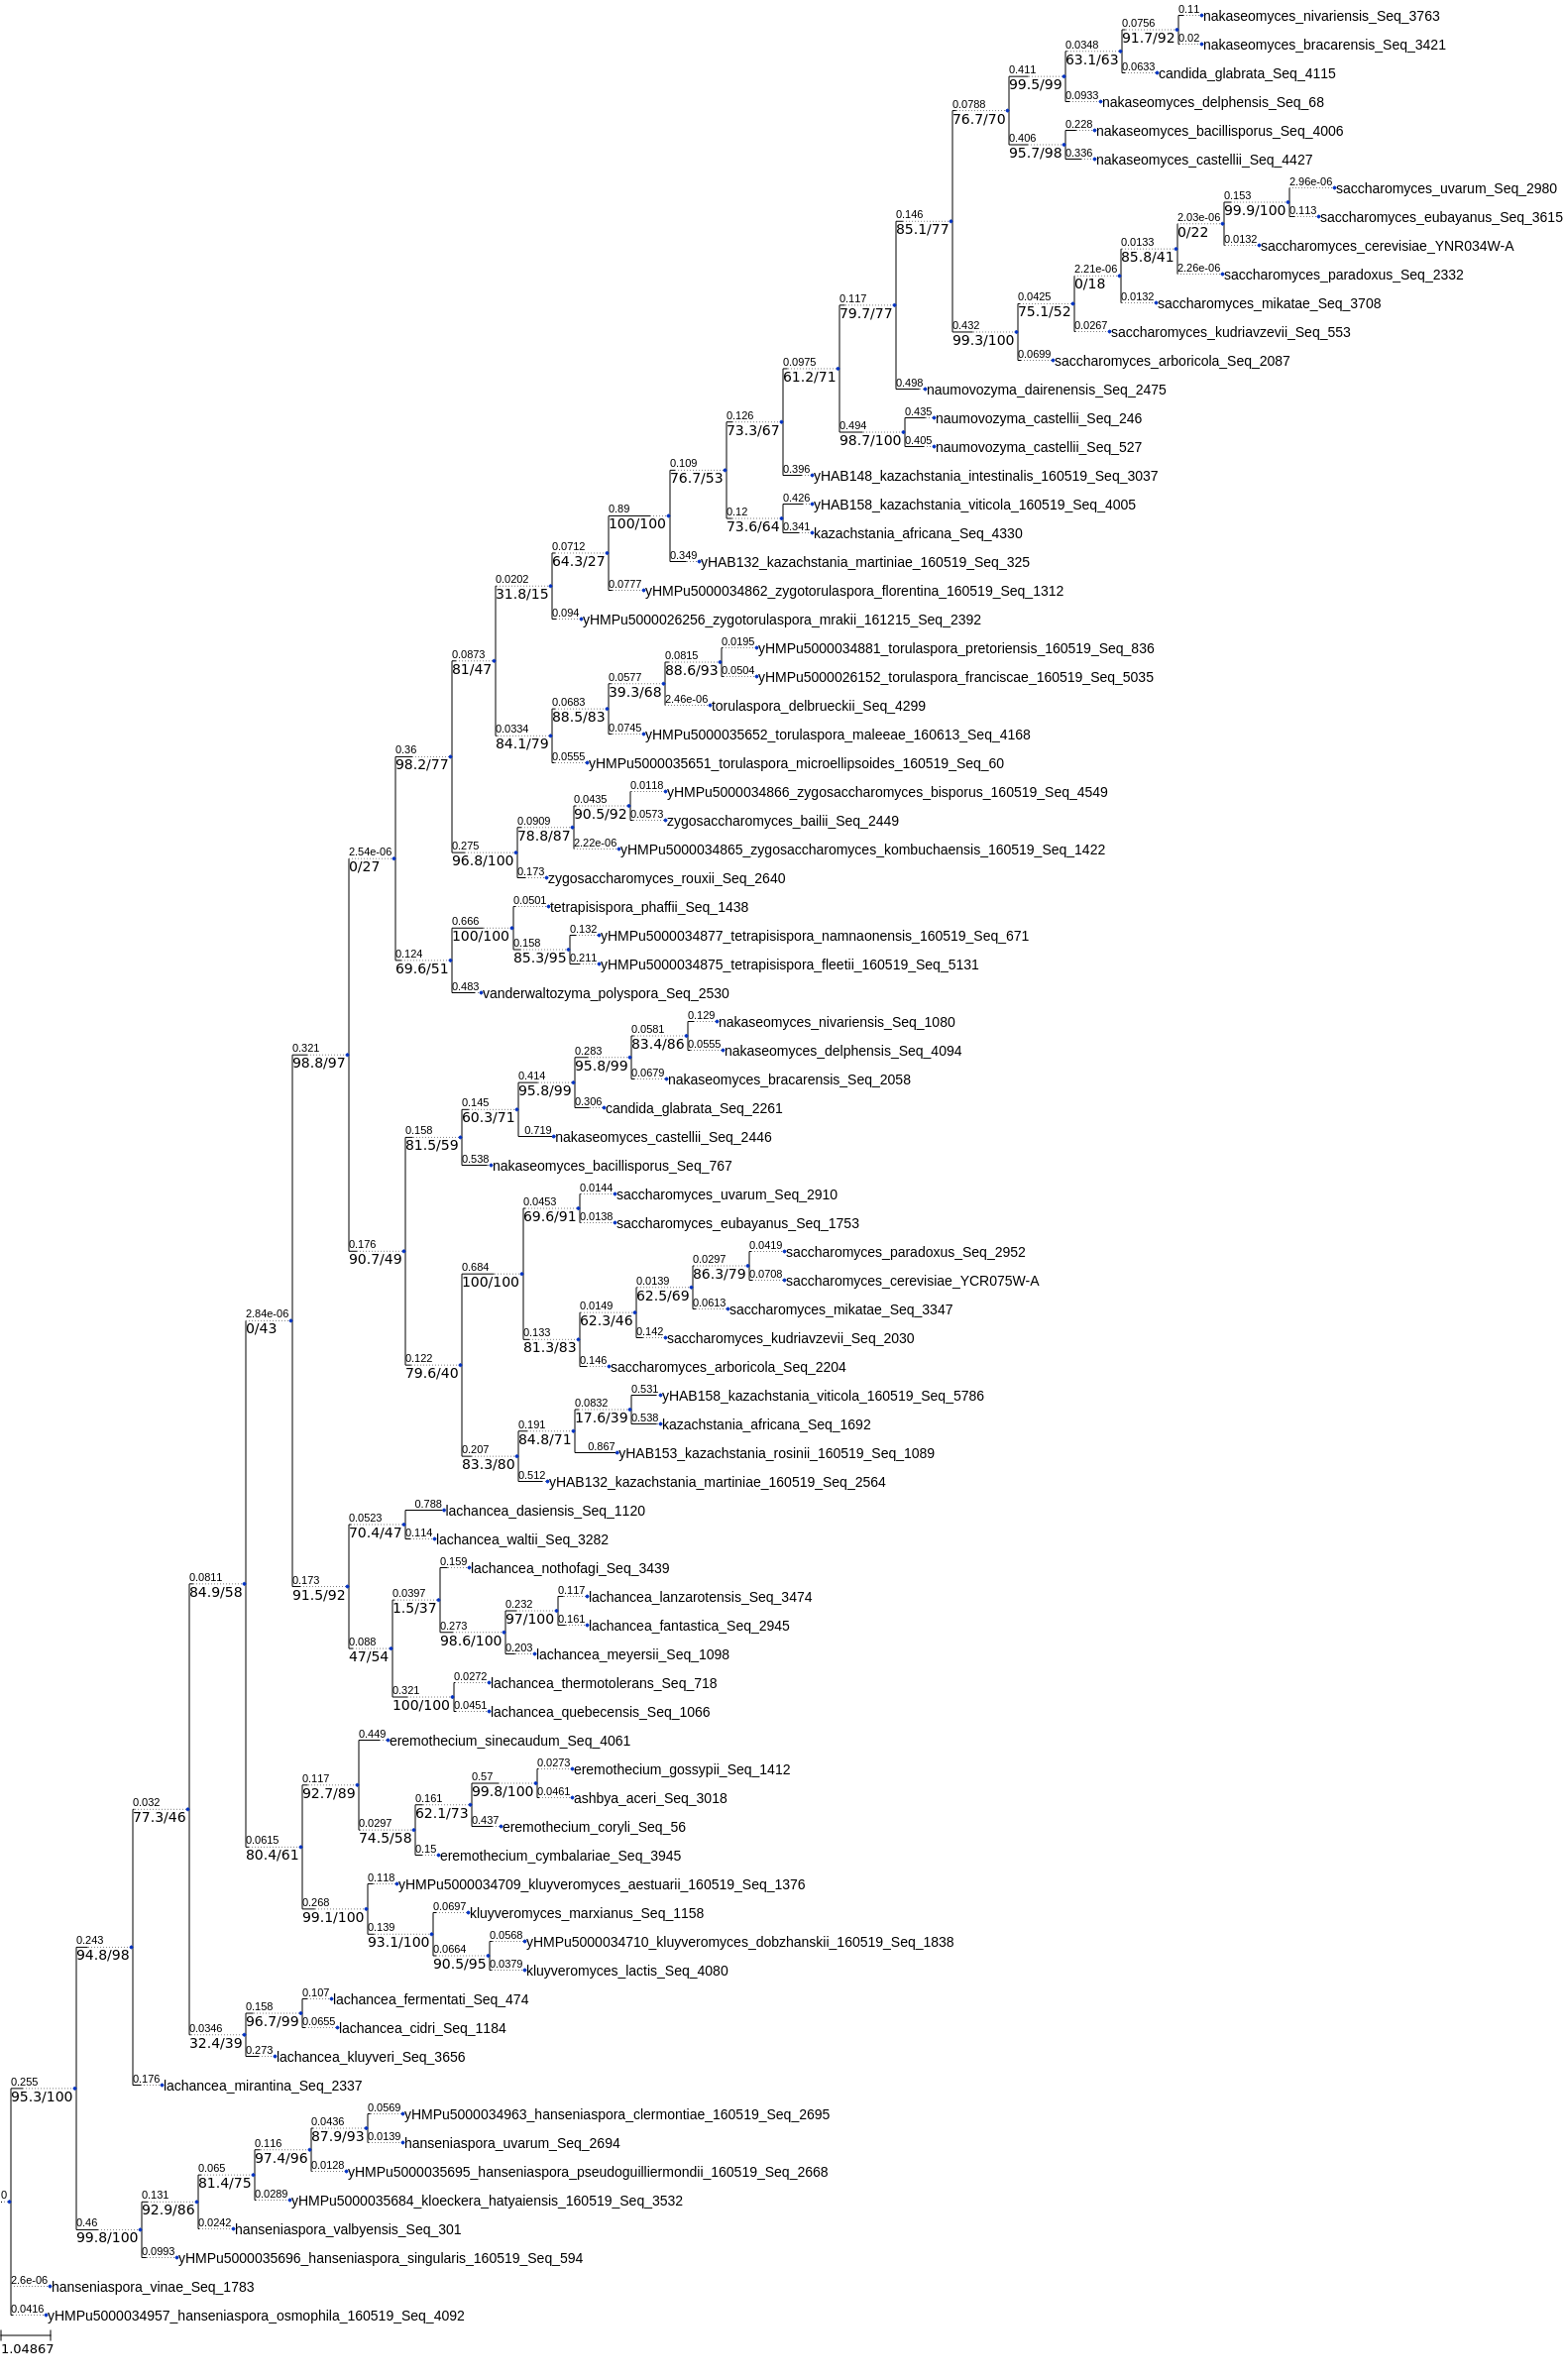

In [16]:
#Plot tree with branch support
t = Tree(fname_tree, format=1)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True

for node in t.traverse():
    if not(node.is_leaf()):
        node_label = TextFace(node.name)
        node.add_face(node_label, column=1, position = "branch-bottom")
t.render('%%inline', tree_style=ts)


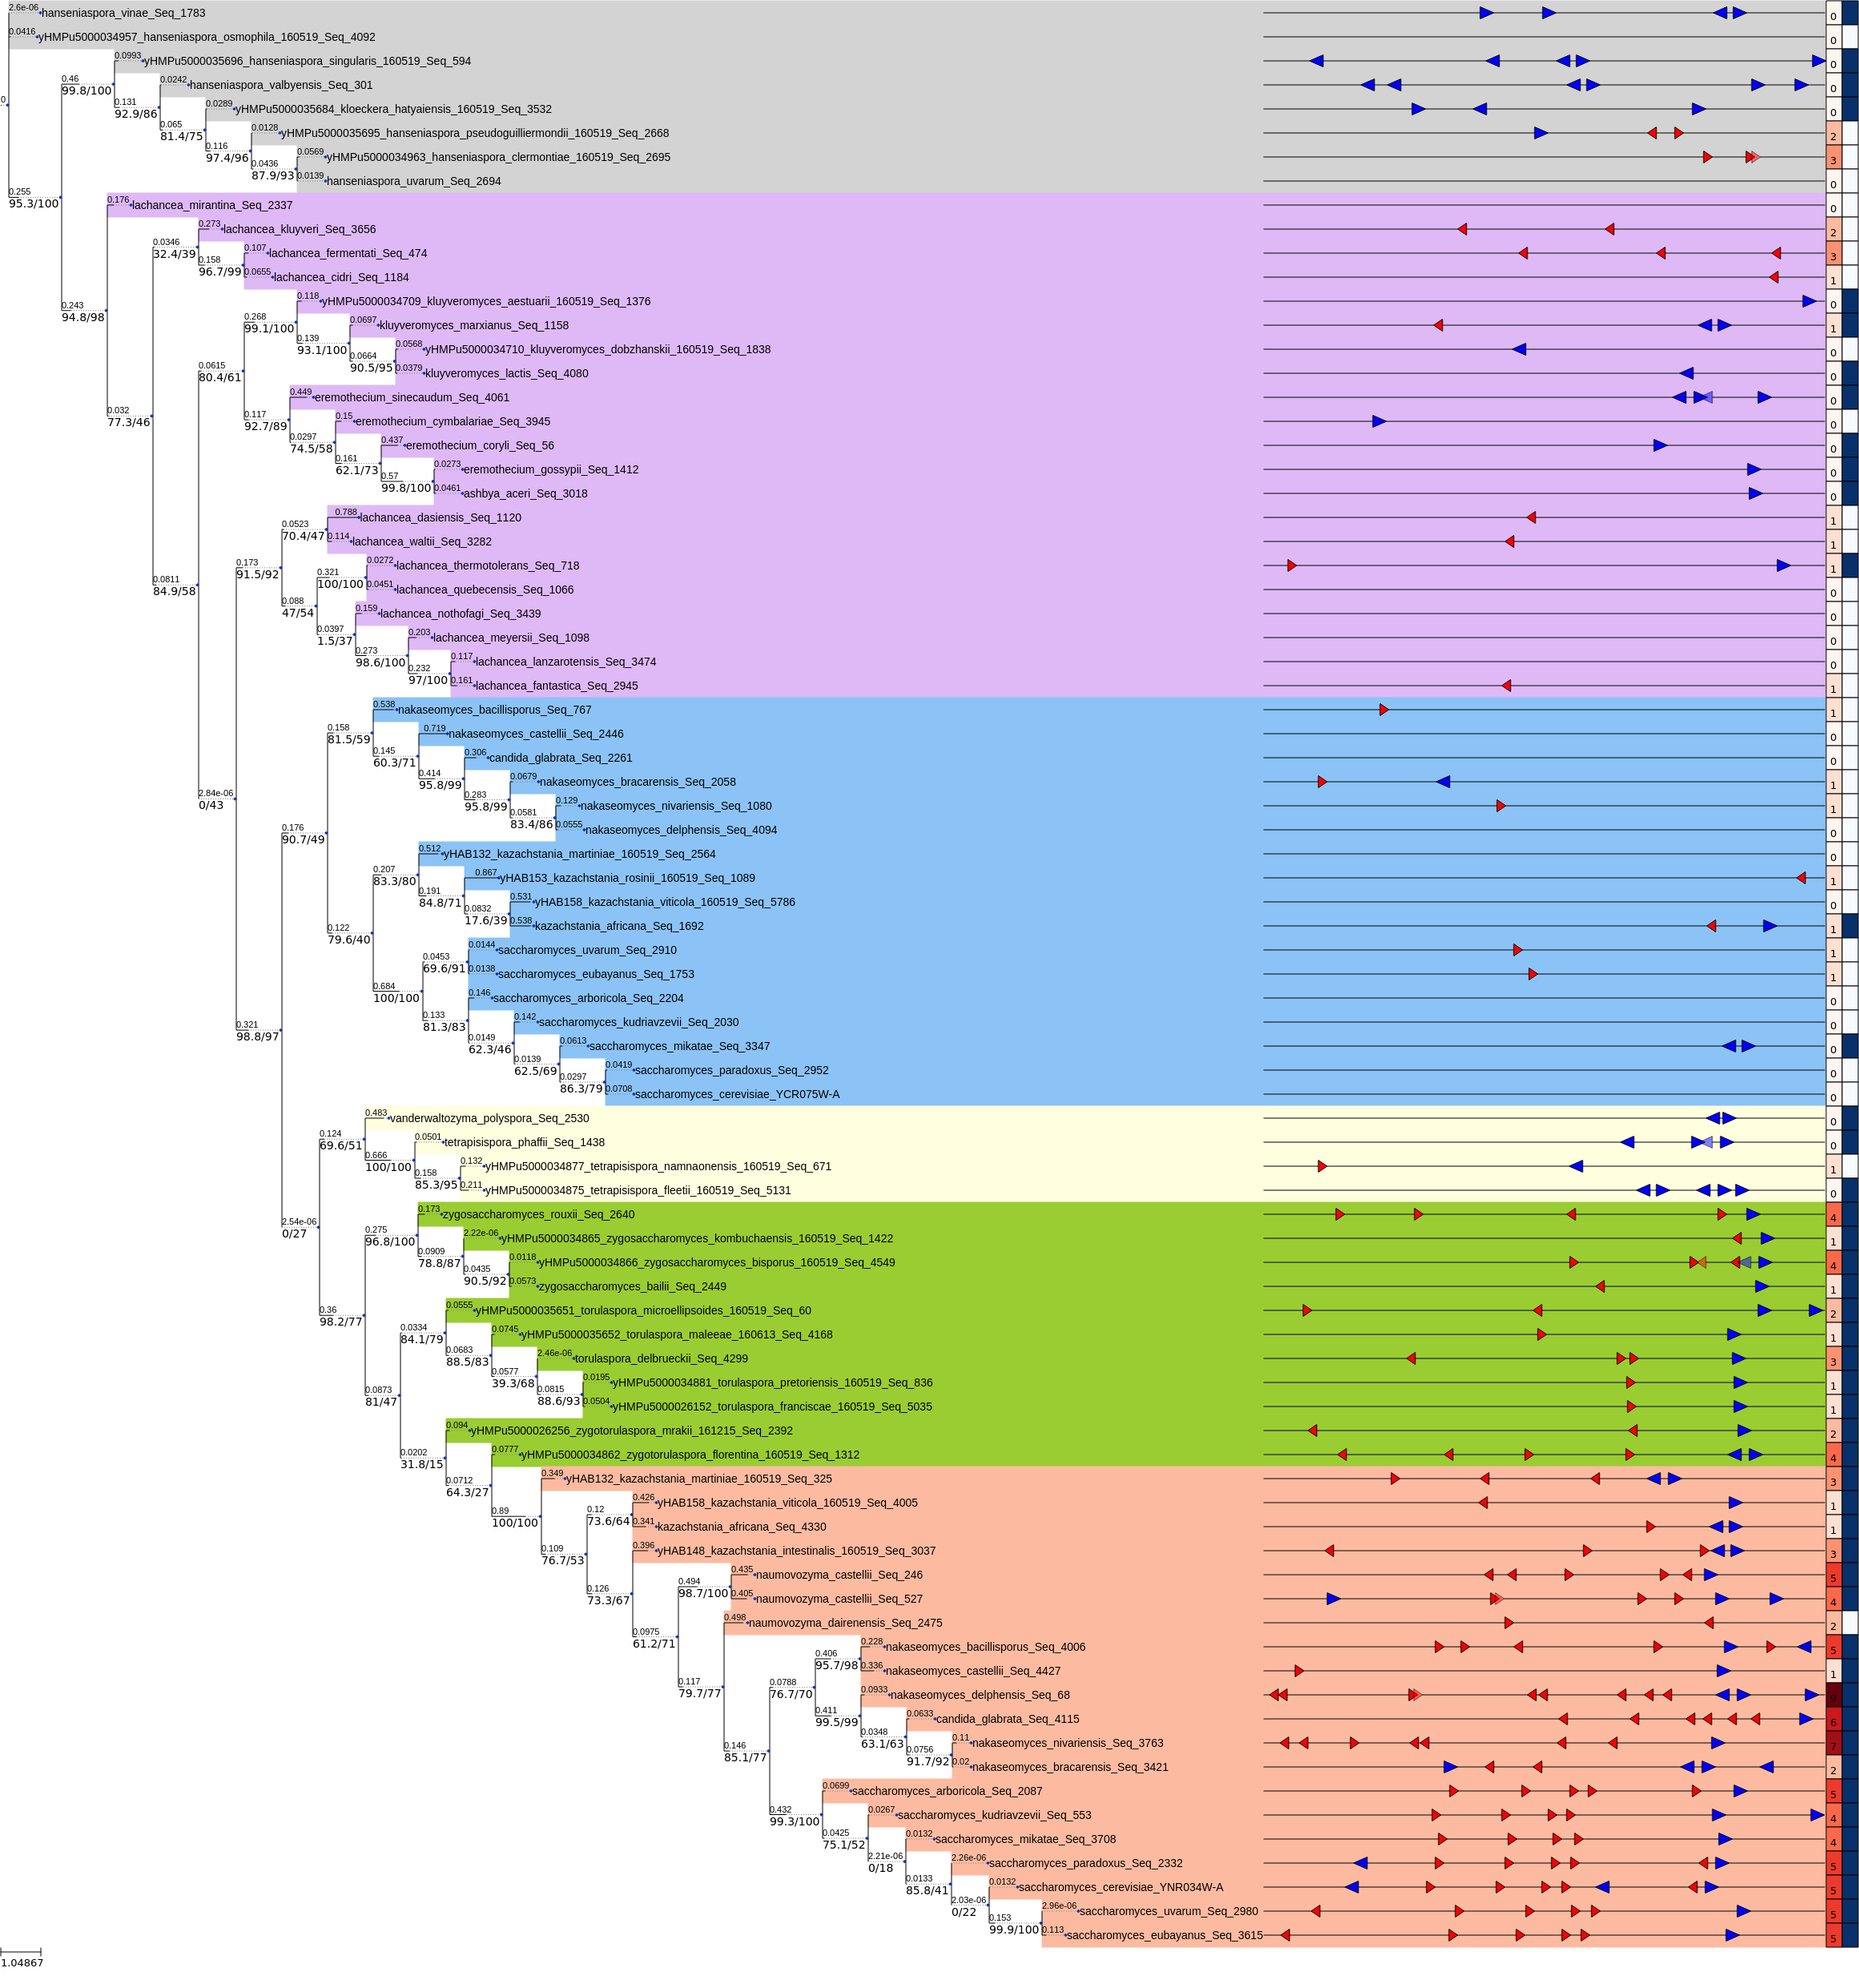

In [17]:
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('_einsi_9','einsi_')}

goi_pair = 'EGO4_EGO2'#'GPM2_GPM3' #'GND2_GND1'#
og = goi_pair_og_lookup[goi_pair]


fname_tree = '/home/heineike/genomes/y1000plus/proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile'

fname_out = home_dir + 'scratch/' + goi_pair + '.svg'


#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname,y1000_species_subset)

motif_names = ['TATA', 'STRE']

(t,ts) = y1000plus_tools.plot_tree_proms(goi_pair, prom_phyls, fname_tree, y1000_species_subset, proms, motif_names)

#t.render(fname_out, tree_style=ts)
t.render('%%inline', tree_style=ts)


In [ ]:
#grey text = #cccccc

In [18]:
# Assign summary nodes for each tree, also assign outgroups to remove from the visualization
anc_nodes = {}
#Tuple contains node1, node2, Clade (for coloring)
anc_nodes['GND2_GND1'] = {'Zygosaccharomyces/Torulaspora': ('zygosaccharomyces_rouxii_Seq_3381', 'torulaspora_delbrueckii_Seq_2893','ZT' ), 
             'Saccharomyces High': ('saccharomyces_cerevisiae_YGR256W','saccharomyces_eubayanus_Seq_2030', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YHR183W', 'saccharomyces_eubayanus_Seq_879', 'low' ), 
             'Kluyveromyces/Eremothecium': ('kluyveromyces_marxianus_Seq_4323','eremothecium_gossypii_Seq_1255', 'KLE'), 
             'Lachancea' : ('lachancea_mirantina_Seq_1227','lachancea_waltii_Seq_1709', 'KLE'), 
             'Hanseniaspora Outgroup': ('hanseniaspora_vinae_Seq_3519', 'hanseniaspora_valbyensis_Seq_1257', 'outgroup' ), 
             #'Distant Outgroups': ('candida_albicans_C1_13860C_A','ascoidea_rubescens_Seq_713', 'outgroup'),
             'Kazachstania Subset 1': ('yHAB155_kazachstania_spencerorum_160519_Seq_5608','yHAB134_kazachstania_turicensis_160519_Seq_2234', 'low' ),
             'Kazachstania Subset 2': ('yHAB133_kazachstania_unispora_160519_Seq_1356', 'yHAB154_kazachstania_transvaalensis_160519_Seq_432', 'high'),
             'Nakaseomyces': ('nakaseomyces_nivariensis_Seq_5143', 'candida_glabrata_Seq_5136', 'high'), 
             'Vanderwaltozyma/Tetrapsispora': ('vanderwaltozyma_polyspora_Seq_158', 'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_2133', 'Post_WGH')
             #'5': ('kazachstania_africana_Seq_4332', 'yHAB155_kazachstania_spencerorum_160519_Seq_626')
            }

anc_nodes['GPM2_GPM3'] = {'Zygosaccharomyces/Torulaspora': ('zygosaccharomyces_rouxii_Seq_3207', 'torulaspora_delbrueckii_Seq_3086','ZT' ), 
             'Saccharomyces High': ('saccharomyces_cerevisiae_YDL021W',     'saccharomyces_arboricola_Seq_2168', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YOL056W', 'saccharomyces_eubayanus_Seq_4127', 'low' ), 
             'Kluyveromyces': ('kluyveromyces_lactis_Seq_4868','kluyveromyces_marxianus_Seq_4703', 'KLE'), 
             'Lachancea' : ('lachancea_waltii_Seq_2090','lachancea_mirantina_Seq_1893', 'KLE'), 
             'Eremothecium' : ('eremothecium_coryli_Seq_3632','eremothecium_gossypii_Seq_3901', 'KLE'),
             'Hanseniaspora Outgroup': ('hanseniaspora_uvarum_Seq_2296', 'hanseniaspora_valbyensis_Seq_670', 'outgroup' ), 
             'Vanderwaltozyma/Tetrapsispora': ('yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_4595','vanderwaltozyma_polyspora_Seq_4285', 'low' ),
             'Kazachstania': ('yHAB134_kazachstania_turicensis_160519_Seq_1990', 'yHAB132_kazachstania_martiniae_160519_Seq_4635', 'low'),   #'low/Post-WGH'), 
             'Nakaseomyces': ('nakaseomyces_bracarensis_Seq_1806', 'nakaseomyces_delphensis_Seq_2587', 'high')
            }

anc_nodes['EGO4_EGO2'] = {'Zygosaccharomyces': ('zygosaccharomyces_bailii_Seq_2449', 'zygosaccharomyces_rouxii_Seq_2640','ZT' ), 
             'Torulaspora': ('yHMPu5000034881_torulaspora_pretoriensis_160519_Seq_836', 'yHMPu5000035651_torulaspora_microellipsoides_160519_Seq_60', 'ZT'),
             'Saccharomyces High': ('saccharomyces_cerevisiae_YNR034W-A', 'saccharomyces_arboricola_Seq_2087', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YCR075W-A', 'saccharomyces_eubayanus_Seq_1753', 'low' ), 
             'Kluyveromyces': ('kluyveromyces_lactis_Seq_4080','yHMPu5000034709_kluyveromyces_aestuarii_160519_Seq_1376', 'KLE'), 
             'Lachancea' : ('lachancea_waltii_Seq_3282','lachancea_thermotolerans_Seq_718', 'KLE'), 
             'Eremothecium' : ('eremothecium_sinecaudum_Seq_4061','eremothecium_gossypii_Seq_1412', 'KLE'),
             'Hanseniaspora Outgroup': ('hanseniaspora_uvarum_Seq_2694', 'yHMPu5000035696_hanseniaspora_singularis_160519_Seq_594', 'outgroup' ), 
             'Tetrapisispora': ('tetrapisispora_phaffii_Seq_1438', 'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_5131', 'Post_WGH'),
             'Naumovozyma castellii SSD': ('naumovozyma_castellii_Seq_527', 'naumovozyma_castellii_Seq_246', 'high'),
             'Nakaseomyces Subset 1': ('nakaseomyces_bracarensis_Seq_3421','nakaseomyces_delphensis_Seq_68', 'high' ),
             'Nakaseomyces Subset 2': ('candida_glabrata_Seq_2261', 'nakaseomyces_delphensis_Seq_4094', 'low')
            }


outgroup_subtract_set = {}
outgroup_subtract_set['GND2_GND1'] = { 'candida_albicans_C1_13860C_A',
 'debaryomyces_hansenii_Seq_4538',
 'komagataella_pastoris_Seq_3804',
 'wickerhamomyces_anomalus_Seq_1012',
 'cyberlindnera_jadinii_Seq_3693',
 'ascoidea_rubescens_Seq_713',
 'ascoidea_rubescens_Seq_504'}

outgroup_subtract_set['GPM2_GPM3'] = set()

outgroup_subtract_set['EGO4_EGO2'] = set()

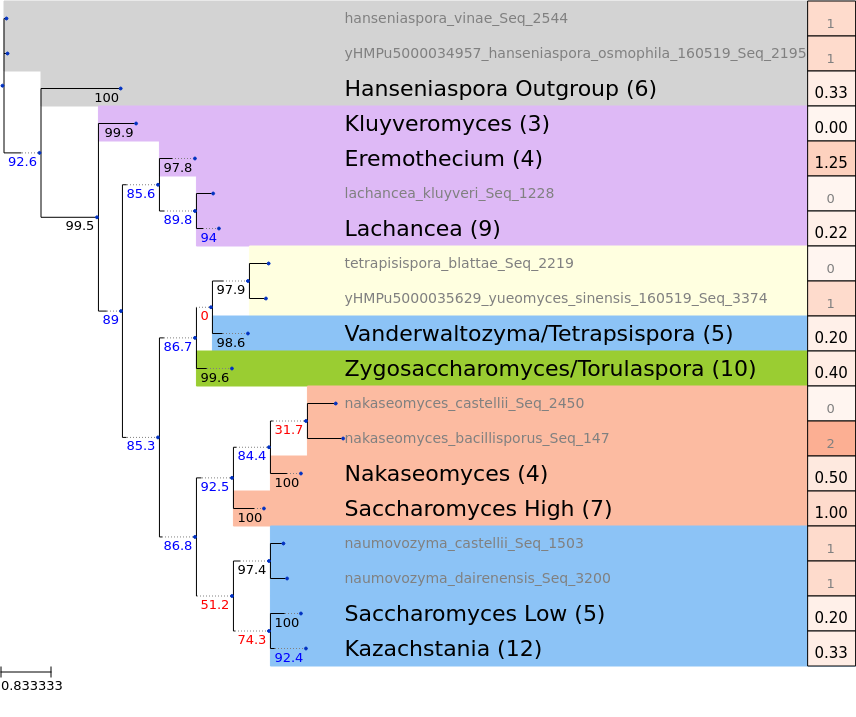

In [64]:
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('_einsi_9','einsi_')}

goi_pair = 'GPM2_GPM3' #'EGO4_EGO2'#'GND2_GND1'#'GPM2_GPM3' #
og = goi_pair_og_lookup[goi_pair]

fname_tree = '/home/heineike/genomes/y1000plus/proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile'
fname_out = home_dir + 'scratch/' + goi_pair + '_summarized.svg'

#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname, y1000_species_subset)


t_abbrev, ts = y1000plus_tools.plot_tree_summary(goi_pair, fname_tree, y1000_species_subset, anc_nodes, outgroup_subtract_set, prom_phyls, proms)
t_abbrev.render(fname_out, tree_style = ts)
t_abbrev.render('%%inline', tree_style=ts)


In [46]:
a = ''
float(a)


ValueError: could not convert string to float: 

In [47]:
#Calculation to figure out where STREs and TATA boxes are in the promoter for GPM2/3


(node1, node2, color_scheme) = anc_nodes['GPM2_GPM3']['Saccharomyces High']


t = Tree(fname_tree, format=1)

t2 = t.get_common_ancestor(node1, node2)
t2.get_leaf_names()

leaf_inds = []
for leaf in t2.get_leaf_names():
    leaf_inds.append('_'.join(leaf.split('_')[0:2]) + '@' + '_'.join(leaf.split('_')[2:]))
leaf_inds

['saccharomyces_arboricola@Seq_2168',
 'saccharomyces_paradoxus@Seq_4505',
 'saccharomyces_cerevisiae@YDL021W',
 'saccharomyces_mikatae@Seq_4168',
 'saccharomyces_kudriavzevii@Seq_2898',
 'saccharomyces_uvarum@Seq_298',
 'saccharomyces_eubayanus@Seq_4042']

In [46]:
proms.loc[leaf_inds,['STRE_full_features']].to_dict()

{'STRE_full_features': {'saccharomyces_arboricola@Seq_2168': [(508,
    'rev',
    'AACCCCTTA')],
  'saccharomyces_cerevisiae@YDL021W': [(424, 'rev', 'AACCCCTTA')],
  'saccharomyces_eubayanus@Seq_4042': [(481, 'rev', 'AACCCCTTA')],
  'saccharomyces_kudriavzevii@Seq_2898': [(482, 'rev', 'AACCCCTTA')],
  'saccharomyces_mikatae@Seq_4168': [(476, 'rev', 'AACCCCTTA')],
  'saccharomyces_paradoxus@Seq_4505': [(456, 'rev', 'AACCCCTTA')],
  'saccharomyces_uvarum@Seq_298': [(475, 'rev', 'AACCCCTTA')]}}

In [44]:
proms.loc[leaf_inds,['TATA_full_features']].to_dict()

{'TATA_full_features': {'saccharomyces_arboricola@Seq_2168': [(661,
    'fwd',
    'AATATAAATGAG'),
   (556, 'fwd', 'ATTATAAAAATA'),
   (96, 'fwd', 'CATATATATATA'),
   (82, 'fwd', 'TGTATATATAAG'),
   (91, 'rev', 'CTTATATATACA'),
   (101, 'rev', 'CATATATATATA'),
   (147, 'rev', 'TGTATATATGTA')],
  'saccharomyces_cerevisiae@YDL021W': [(327, 'fwd', 'TTTATAAATAAT'),
   (106, 'fwd', 'CTTATATATATA'),
   (113, 'rev', 'CGTATATATATA'),
   (340, 'rev', 'TTTATAAAAACG')],
  'saccharomyces_eubayanus@Seq_4042': [(92, 'fwd', 'ATTATATATAAG'),
   (101, 'rev', 'CTTATATATAAT')],
  'saccharomyces_kudriavzevii@Seq_2898': [(102, 'fwd', 'ATTATATATATA'),
   (109, 'rev', 'CATATATATATA')],
  'saccharomyces_mikatae@Seq_4168': [(677, 'fwd', 'CCTATATATGTC'),
   (120, 'fwd', 'TCTATATATATA'),
   (112, 'fwd', 'TATATATATATA'),
   (117, 'rev', 'TGTATATATATA'),
   (125, 'rev', 'TATATATATATA'),
   (359, 'rev', 'TCTATAAAAGCA')],
  'saccharomyces_paradoxus@Seq_4505': [(113, 'fwd', 'CTTATATATATA'),
   (105, 'fwd', 'TATATATA

In [248]:
## Make this a function for plotting summary trees
#og = goi_pair_og_lookup[goi_pair]

def plot_tree_summary(goi_pair, fname_tree, y1000_species_subset, anc_nodes, outgroup_subtract_set, prom_phyls, proms):
    #Plots a summary tree given node pairs to summarize along with the average of the STRE count within a range
    #defined in this function as L_STRE_count
    #returns t_abbrev, an ete3 tree object which is a subset of the original tree. 
    
    sacc_families = {'Candida': 'Post_WGH',
                     'Kazachstania': 'Post_WGH',
                     'Nakaseomyces': 'Post_WGH',
                     'Naumovozyma': 'Post_WGH',
                     'Saccharomyces': 'Post_WGH',
                     'Tetrapisispora': 'Post_WGH',
                     'Vanderwaltozyma': 'Post_WGH',
                     'Yueomyces': 'Post_WGH',
                     'Zygosaccharomyces': 'ZT',
                     'Zygotorulaspora': 'ZT',
                     'Torulaspora': 'ZT',
                     'Kluyveromyces': 'KLE',
                     'Lachancea': 'KLE',
                     'Eremothecium': 'KLE',
                     'Ashbya': 'KLE'
                    }

    #Color Node by species: 
    sacc_colors = {'KLE': "#C6AFE9", 
                   'ZT': "YellowGreen",
                   'Post_WGH': "LightYellow" #White" # "LightYellow"
                  }

    post_WGH_colors = {'low':  '#7eeaf7', ##2DD7ED',      #'#e6fcff', 
                       'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


    node_color_dict = {'KLE': "#C6AFE9",
                       'ZT': "YellowGreen",
                       'Post_WGH': "LightYellow",   #default color for post WGH
                       'low': '#7eeaf7',    #syntenic orthologs of low LFC ohnolog
                       'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
                       'outgroup': 'LightGrey'
                      }

    L_STRE_count = 700
    cmap_STRE = cm.get_cmap('Reds')
    vmin = 0.0
    vmax = 7.0
    cmap_STRE_norm = colors.Normalize(vmin=vmin, vmax=vmax)
    #box params:
    width_box = 45
    height_box = 30


    t = Tree(fname_tree, format=1)
    t.ladderize()
    ts = TreeStyle()
    ts.scale =  60 # 120 pixels per branch length unit
    ts.show_leaf_name = False#True
    # ts.show_branch_length = True
    # ts.mode = "c"
    # ts.arc_start = -90 # 0 degrees = 3 o'clock
    # ts.arc_span = 180
    t_abbrev = t.copy()



    for node in t_abbrev.traverse():
        if node.is_leaf():
            #Get the species and gets the gene_id for finding promoter sequences
            if 'saccharomyces_cerevisiae' in node.name:       
                species='saccharomyces_cerevisiae'
                gene_id = species + '@' + node.name.split(species +'_')[1]
            elif 'candida_albicans' in node.name: 
                species = 'candida_albicans'
                gene_id = species + '@' + node.name.split(species +'_')[1]
            else: 
                species = '_'.join(node.name.split('_')[:-2])
                gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])


            #color node by major clade / family if in Sacch clade
            row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
            maj_clade = row['Major clade'].values[0]

            if maj_clade == 'Saccharomycetaceae':
                genus = row['Genus'].values[0]
                node_color = sacc_colors[sacc_families[genus]]
                if node.name in prom_phyls[goi_pair]['low']: 
                    node_color = post_WGH_colors['low']
                elif node.name in prom_phyls[goi_pair]['high']: 
                    node_color = post_WGH_colors['high']    
            #species == outgroup_orig_genome:
            #elif species == 'hanseniaspora_vinae':
            #    node_color = 'LightGrey'
            else:
                node_color = 'LightGrey'
                #node_color = maj_clade_colors[maj_clade]

            nstyle = NodeStyle()
            nstyle['bgcolor']=node_color
            node.set_style(nstyle)

            #Add face for node distance
            node_dist = TextFace('{:.3f}'.format(node.dist), fsize=8, fstyle='italic')
            node.add_face(node_dist, column=1, position = "branch-bottom")

            #node label
            node_name_label = AttrFace("name", fsize=10, fgcolor="grey")
            node.add_face(node_name_label, column=1, position = "aligned")

            #add face for number of STREs within L_STRE_count basepairs        
            prom_results = proms.loc[gene_id]

            N_STRE = 0
            for result in prom_results['STRE_full_features']:
                if result[0]<L_STRE_count:
                    N_STRE = N_STRE+1

            rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(N_STRE)))

            rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                                label= {"text": str(N_STRE), 
                                        "color": 'grey', 
                                        "fontsize": 9,
                                        "font": 'Verdana'
                                       }
                               )
            node.add_face(rectFace_STRE, column = 2, position= "aligned")



        else:    # If node is not a leaf, add the support label and branch length
            node_label = TextFace(node.name.split('/')[0], fsize=8)
            node.add_face(node_label, column=1, position = "branch-top")
            node_dist = TextFace('{:.3f}'.format(node.dist), fsize=8, fstyle='italic')
            node.add_face(node_dist, column=1, position = "branch-bottom")


    left_leaves = set(t_abbrev.get_leaf_names())
    for node_name, (node1, node2, node_group) in anc_nodes[goi_pair].items(): 
        anc_node = t_abbrev.get_common_ancestor([node1, node2])
        #print(anc_node.name)
        if len(anc_node.name.split('/'))==2:
            anc_node.add_features(shalrt=anc_node.name.split('/')[0], bootstrap=anc_node.name.split('/')[1])
        else:
            anc_node.add_features(shalrt=np.nan,bootstrap = np.nan)
        anc_node.add_features()
        anc_node.name = node_name
        left_leaves = left_leaves - set(anc_node.get_leaf_names())
        nstyle = NodeStyle()
        node_color = node_color_dict[node_group]
        nstyle['bgcolor']=node_color
        anc_node.set_style(nstyle)

        #grouped node label
        summarized_nodes = anc_node.get_leaves()
        
        grouped_node_face = TextFace(anc_node.name + " ({})".format(len(summarized_nodes)), fsize=16, fgcolor="black")
        anc_node.add_face(grouped_node_face, column=1, position = "aligned")
        #print(left_leaves)

        #Add a face for STRE numbers      

        gene_ids = []
        for node in summarized_nodes:
            if 'saccharomyces_cerevisiae' in node.name:       
                species='saccharomyces_cerevisiae'
                gene_id = species + '@' + node.name.split(species +'_')[1]
            elif 'candida_albicans' in node.name: 
                species = 'candida_albicans'
                gene_id = species + '@' + node.name.split(species +'_')[1]
            else: 
                species = '_'.join(node.name.split('_')[:-2])
                gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])
            gene_ids.append(gene_id)

        STRE_counts = []
        for gene_id in gene_ids: 
            prom_results = proms.loc[gene_id]
            N_STRE = 0
            for result in prom_results['STRE_full_features']:
                if result[0]<L_STRE_count:
                    N_STRE = N_STRE+1
            STRE_counts.append(N_STRE)

        rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(np.mean(STRE_counts))))

        rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                                label= {"text": '{:0.2f}'.format(np.mean(STRE_counts)), 
                                        "color": 'black', 
                                        "fontsize": 10, 
                                        "font": 'Verdana'
                                       }
                                 )
        anc_node.add_face(rectFace_STRE, column = 2, position= "aligned")


    left_leaves = left_leaves - outgroup_subtract_set[goi_pair]

    t_abbrev.prune(list(anc_nodes[goi_pair].keys()) + list(left_leaves))

    return t_abbrev, ts



In [245]:
## Old promoter visualization routine
# #Visualize the tree with sequence next to it

# # goi_pair_og_lookup =  {'NQM1_TAL1': 'OG1667', 
# #                      'GND2_GND1': 'OG1488', 
# #                      'PGM2_PGM1': 'OG1302', 
# #                      'ENO1_ENO2': 'OG1193', 
# #                      'SOL4_SOL3': 'OG3991', 
# #                      'MPC3_MPC2': 'OG1859', 
# #                      'TPK1_TPK3': 'OG4796',
# #                      'GPM2_GPM3': 'OG6005'
# #                     }

# sacc_families = {'Candida': 'Post_WGH',
#                  'Kazachstania': 'Post_WGH',
#                  'Nakaseomyces': 'Post_WGH',
#                  'Naumovozyma': 'Post_WGH',
#                  'Saccharomyces': 'Post_WGH',
#                  'Tetrapisispora': 'Post_WGH',
#                  'Vanderwaltozyma': 'Post_WGH',
#                  'Yueomyces': 'Post_WGH',
#                  'Zygosaccharomyces': 'ZT',
#                  'Zygotorulaspora': 'ZT',
#                  'Torulaspora': 'ZT',
#                  'Kluyveromyces': 'KLE',
#                  'Lachancea': 'KLE',
#                  'Eremothecium': 'KLE',
#                  'Ashbya': 'KLE'
#                 }


# less_nonsacc=False

# #Color Node by species: 
# sacc_colors = {'KLE': "#C6AFE9", 
#                'ZT': "YellowGreen",
#                'Post_WGH': "LightYellow" #White" # "LightYellow"
#               }

# post_WGH_colors = {'low':  '#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}

# # maj_clade_colors = {'Saccharomycodaceae': "BlanchedAlmond",
# #     'Phaffomycetaceae': "Bisque",
# #     'CUG-Ser2': 'NavajoWhite',
# #     'CUG-Ser1': "Wheat",
# #     'Pichiaceae': "BurlyWood",
# #     'CUG-Ala':"Tan"
# #     }

# pre_wgd_purple = "#bb95d6"
# maj_clade_colors = {'Saccharomycodaceae': 'LightGrey',#pre_wgd_purple,
#     'Phaffomycetaceae': pre_wgd_purple,
#     'CUG-Ser2': pre_wgd_purple,
#     'CUG-Ser1': pre_wgd_purple,
#     'Pichiaceae': pre_wgd_purple,
#     'CUG-Ala': pre_wgd_purple
#     }

# goi_pair = 'GPM2_GPM3' #'EGO4_EGO2'#'GND2_GND1'#'GND2_GND1'#'GPM2_GPM3'
# og = goi_pair_og_lookup[goi_pair]

# # protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_pair + '_' + og)
# # tree_fname = protein_fname_base + '_aln_trimmed.fasta.treefile'
# t = Tree(tree_fname)
# t.ladderize()
# L_prom = 700
# height = 15
# seq = '-'*L_prom

# motif_colors = {'PDS': 'yellow', 'TATA': 'blue', 'STRE': 'red'}
# motif_lengths = {'PDS': 12, 'TATA': 16, 'STRE': 10 }  #They are double the size

# #box params:
# width_box = 20
# height_box = 30

# cmap_STRE = cm.get_cmap('Reds')

# vmin = 0.0
# vmax = 8.0

# norm = colors.Normalize(vmin=vmin, vmax=vmax)

# cmap_TATA = cm.get_cmap("Blues")

# # To get rid of a set of species for the visualization
# if less_nonsacc: 
#     nonsacc_visualization_subset = pd.read_csv(y1000plus_dir + 'species_visualization_subset.csv')
#     species_subset = ( set(nonsacc_visualization_subset['original_genome_id']) | \
#                        set(y1000_species[y1000_species['Major clade']=='Saccharomycetaceae']['original_genome_id']) ) # | \
#                        #set(y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'])
#                      #)
#     y1000_species_subset = y1000_species[(y1000_species['original_genome_id'].isin(species_subset))]
#     node_subset = []
#     #For each node in the tree:
#     for node in t.iter_leaves():  
#         #Get the promoter sequence with motif info, make it into a motif list
#         if 'saccharomyces_cerevisiae' in node.name:
#             species='saccharomyces_cerevisiae'
#         else: 
#             species = '_'.join(node.name.split('_')[:-2])
#         if species in species_subset: 
#             node_subset.append(node.name)

#     t.prune(node_subset)
#     t.ladderize()

# # for node in t.iter_leaves():  
# #     print(node.name)

# #For each node in the tree:
# for node in t.iter_leaves():  
#     #Get the promoter sequence with motif info, make it into a motif list
#     if 'saccharomyces_cerevisiae' in node.name:       
#         species='saccharomyces_cerevisiae'
#         gene_id = species + '@' + node.name.split(species +'_')[1]
#     elif 'candida_albicans' in node.name: 
#         species = 'candida_albicans'
#         gene_id = species + '@' + node.name.split(species +'_')[1]
#     else: 
#         species = '_'.join(node.name.split('_')[:-2])
#         gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])
    
#     #color node by major clade / family if in Sacch clade
#     row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
#     maj_clade = row['Major clade'].values[0]

#     if maj_clade == 'Saccharomycetaceae':
#         genus = row['Genus'].values[0]
#         node_color = sacc_colors[sacc_families[genus]]
#         if node.name in prom_phyls[goi_pair]['low']: 
#             node_color = post_WGH_colors['low']
#         elif node.name in prom_phyls[goi_pair]['high']: 
#             node_color = post_WGH_colors['high']    
#     #species == outgroup_orig_genome:
#     #elif species == 'hanseniaspora_vinae':
#     #    node_color = 'LightGrey'
#     else:
#         node_color = 'LightGrey'
#         #node_color = maj_clade_colors[maj_clade]
    
#     nstyle = NodeStyle()
#     nstyle['bgcolor']=node_color
#     node.set_style(nstyle)
    
#     prom_results = proms.loc[gene_id]
    
# #     simple_motifs = [
# #             # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
# #             [10, 60, ">", None, 10, "black", "red", None],
# #             [120, 150, "<", None, 10, "black", "red", None]
# #     ]
#     motifs = []
    
#     for motif_name in ['TATA', 'STRE']: #, 'PDS']:   #Leaving out PDS
#         motif_len = motif_lengths[motif_name]
#         motif_color = motif_colors[motif_name]
#         if prom_results[motif_name + '_count'] >0:

#             for motif in prom_results[motif_name + '_full_features']:
#                 loc = motif[0]
#                 if loc <= L_prom:
#                     direction = motif[1]
#                     shape = '>'
#                     start = L_prom-loc
#                     stop = L_prom-loc + motif_len
#                     if direction == 'rev':
#                         shape = '<'
#                         start = L_prom-loc-motif_len
#                         stop = L_prom -loc
#                     motifs.append([start,stop,shape,None, height, "black", motif_color, None])

#     seqFace = SeqMotifFace(seq, motifs=motifs, seq_format="-")
#     node.add_face(seqFace, column=0, position="aligned")
    
    
#     #Add face for STRE count within 500bp
    
#     motif_name = 'STRE'
#     L_STRE_count = 500
    
#     N_STRE = 0
#     for result in prom_results['STRE_full_features']:
#         if result[0]<L_STRE_count:
#             N_STRE = N_STRE+1
     
#     rgb = colors.to_hex(cmap_STRE(norm(N_STRE)))
    
#     rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
#                         label= {"text": str(N_STRE), 
#                                 "color": 'black', 
#                                 "fontsize": 10, 
#                                 "font": 'Verdana'
#                                }
#                        )
#     node.add_face(rectFace_STRE, column = 1, position= "aligned")
    
#     motif_name = 'TATA'
#     L_TATA = 300
    
#     TATA = 0.0
#     for result in prom_results['TATA_full_features']:
#         if result[0]<L_TATA:
#             TATA = 1.0
     
#     rgb = colors.to_hex(cmap_TATA(TATA))
    
#     rectFace_TATA = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)
    
#     node.add_face(rectFace_TATA, column=2, position="aligned")
    

# t.render('%%inline')
# # fname = home_dir + 'scratch/' + goi_pair + '.svg'
# # t.render(fname)


## Visualize time calibrated tree for Fig 3

In [56]:
t.get_leaf_names()

['Babjeviella_inositovora',
 'Millerozyma_acaciae',
 'Debaryomyces_maramus',
 'Debaryomyces_nepalensis',
 'Debaryomyces_hansenii',
 'Debaryomyces_prosopidis',
 'Debaryomyces_fabryi',
 'Debaryomyces_subglobosus',
 'Priceomyces_carsonii',
 'Priceomyces_medius',
 'Priceomyces_castillae',
 'Priceomyces_haplophilus',
 'Scheffersomyces_lignosus',
 'Scheffersomyces_stipitis',
 'Spathaspora_passalidarum',
 'Spathaspora_girioi',
 'Spathaspora_arborariae',
 'Spathaspora_gorwiae',
 'Spathaspora_hagerdaliae',
 'Candida_sojae',
 'Candida_tropicalis',
 'Candida_albicans',
 'Candida_dubliniensis',
 'Candida_corydali',
 'Lodderomyces_elongisporus',
 'Candida_orthopsilosis',
 'Candida_parapsilosis',
 'Aciculoconidium_aculeatum',
 'Kodamaea_laetipori',
 'Candida_restingae',
 'Kodamaea_ohmeri',
 'Suhomyces_pyralidae',
 'Suhomyces_tanzawaensis',
 'Suhomyces_emberorum',
 'Suhomyces_canberraensis',
 'Wickerhamia_fluorescens',
 'Teunomyces_gatunensis',
 'Teunomyces_kruisii',
 'Teunomyces_cretensis',
 'Candid

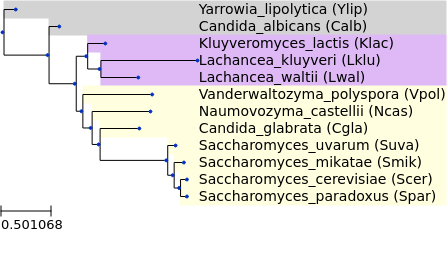

In [63]:
y1000plus_dir = '/home/heineike/genomes/y1000plus/'
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


node_color_dict = {'KLE':"#deb9f6",
                   'ZT': "YellowGreen",
                   'Post_WGH': "LightYellow",   #default color for post WGH
                   'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
                   'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
                   'outgroup': 'LightGrey'
                  }


leaves_to_view = {'Yarrowia_lipolytica':('outgroup', 'Ylip'),
                  'Candida_albicans': ('outgroup','Calb'),
                'Lachancea_kluyveri': ('KLE','Lklu'),
                 'Lachancea_waltii':  ('KLE','Lwal'),
                 'Kluyveromyces_lactis': ('KLE','Klac'),
                  'Vanderwaltozyma_polyspora': ('Post_WGH','Vpol'),
                 'Naumovozyma_castellii': ('Post_WGH','Ncas'),
                 'Candida_glabrata': ('Post_WGH','Cgla'),
                 #'Saccharomyces_eubayanus': ('post_WGH','Seub'),
                 'Saccharomyces_uvarum': ('Post_WGH','Suva'),
                 'Saccharomyces_mikatae': ('Post_WGH','Smik'),
                 'Saccharomyces_cerevisiae': ('Post_WGH','Scer'),
                  'Saccharomyces_paradoxus': ('Post_WGH','Spar')
                 }

t.prune(leaves_to_view.keys())

t.ladderize()

for node in t.get_leaves():
    name = node.name
    group, abbrev = leaves_to_view[name]
    
    nstyle = NodeStyle()
    node_color = node_color_dict[group]
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    node_label_face = TextFace(name + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")

fname = home_dir + 'scratch/time_tree_exp_species.svg'
t.render(fname, tree_style=ts)
t.render('%%inline', tree_style=ts)


In [ ]:

    
grouped_node_face = TextFace(anc_node.name + " ({})".format(len(summarized_nodes)), fsize=16, fgcolor="black")

        nstyle = NodeStyle()
        node_color = node_color_dict[node_group]
        nstyle['bgcolor']=node_color
        anc_node.set_style(nstyle)